<a href="https://colab.research.google.com/github/SumeetYadav0/Logistic_Regression_Project/blob/main/Myntra_Discount_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing IMP Lib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Data Import

In [2]:
import zipfile
import pandas as pd

# Unzip the uploaded file
with zipfile.ZipFile('/content/Myntra Fasion Clothing.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load the CSV
df = pd.read_csv('/content/Myntra Fasion Clothing.csv')

# Check the data
df.head(2)


<ipython-input-2-a21b310f1e72>:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/Myntra Fasion Clothing.csv')


,URL,Product_id,BrandName,Category,Individual_category,category_by_Gender,Description,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,SizeOption,Ratings,Reviews
0,https://www.myntra.com/jeans/roadster/roadster...,2296012,Roadster,Bottom Wear,jeans,Men,roadster men navy blue slim fit mid rise clean...,824.0,1499.0,45% OFF,"28, 30, 32, 34, 36",3.9,999.0
1,https://www.myntra.com/track-pants/locomotive/...,13780156,LOCOMOTIVE,Bottom Wear,track-pants,Men,locomotive men black white solid slim fit tra...,517.0,1149.0,55% OFF,"S, M, L, XL",4.0,999.0


##Feature Selection -  Dropping columns which are not usefull




In [3]:
df = df.drop(columns=['URL','Product_id','Description','SizeOption','Reviews'])
df.head(2)

,BrandName,Category,Individual_category,category_by_Gender,DiscountPrice (in Rs),OriginalPrice (in Rs),DiscountOffer,Ratings
0,Roadster,Bottom Wear,jeans,Men,824.0,1499.0,45% OFF,3.9
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,517.0,1149.0,55% OFF,4.0


Fixing DiscountOffer column

In [4]:
unique_discounts = df['DiscountOffer'].unique().tolist()
for val in unique_discounts:
    print(val)


45% OFF
55% OFF
31% OFF
35% OFF
40% OFF
60% OFF
58% OFF
nan
70% OFF
50% OFF
53% OFF
59% OFF
61% OFF
75% OFF
62% OFF
57% OFF
60% OFF, Hurry*
65% OFF
51% OFF
49% OFF
30% OFF
52% OFF
 45 % OFF
71% OFF
25% OFF
66% OFF
38% OFF
20% OFF
64% OFF
63% OFF
43% OFF
Rs. 500 OFF
27% OFF
67% OFF
36% OFF
Rs. 400 OFF
80% OFF
48% OFF
54% OFF
Rs. 300 OFF
69% OFF
73% OFF
47% OFF
5% OFF
15% OFF
68% OFF
17% OFF
23% OFF
Rs. 140 OFF
10% OFF
Rs. 100 OFF
41% OFF
 50 % OFF
Rs. 1456 OFF
56% OFF
Rs. 550 OFF
44% OFF
Rs. 38 OFF
72% OFF
19% OFF
78% OFF
37% OFF
70% OFF, Hurry*
79% OFF
Rs. 200 OFF
28% OFF
Rs. 78 OFF
39% OFF
26% OFF
 60 % OFF
22% OFF
Rs. 2216 OFF
14% OFF
42% OFF
82% OFF
46% OFF
74% OFF
81% OFF
1% OFF
18% OFF
Rs. 975 OFF
Rs. 121 OFF
29% OFF
Rs. 900 OFF
13% OFF
33% OFF
 46 % OFF
8% OFF
32% OFF
Rs. 750 OFF
34% OFF
Rs. 1305 OFF
2% OFF
Rs. 10 OFF
Rs. 1215 OFF
Rs. 1100 OFF
Rs. 499 OFF
77% OFF
Rs. 600 OFF
 43 % OFF
3% OFF
Rs. 1401 OFF
Rs. 800 OFF
16% OFF
Rs. 123 OFF
Rs. 130 OFF
Rs. 2751 OFF
4% OFF
76% OFF
86% 

In [5]:
df['DiscountOffer'] = df['DiscountOffer'].str.replace('OFF', '', regex=False)
df['DiscountOffer'] = df['DiscountOffer'].str.replace('Rs.', '', regex=False)
df['DiscountOffer'] = df['DiscountOffer'].str.replace(', Hurry*', '', regex=False)

# Remove extra spaces (multiple spaces → single space) and strip
df['DiscountOffer'] = df['DiscountOffer'].str.replace(r'\s+', ' ', regex=True).str.strip()


In [6]:
unique_discounts = df['DiscountOffer'].unique().tolist()
for val in unique_discounts:
    print(val)


45%
55%
31%
35%
40%
60%
58%
nan
70%
50%
53%
59%
61%
75%
62%
57%
65%
51%
49%
30%
52%
45 %
71%
25%
66%
38%
20%
64%
63%
43%
500
27%
67%
36%
400
80%
48%
54%
300
69%
73%
47%
5%
15%
68%
17%
23%
140
10%
100
41%
50 %
1456
56%
550
44%
38
72%
19%
78%
37%
79%
200
28%
78
39%
26%
60 %
22%
2216
14%
42%
82%
46%
74%
81%
1%
18%
975
121
29%
900
13%
33%
46 %
8%
32%
750
34%
1305
2%
10
1215
1100
499
77%
600
43 %
3%
1401
800
16%
123
130
2751
4%
76%
86%
560
250
1412
12%
1119
15
85%
700
2500
510
72
1013
24%
1400
80
82
183
450
9%
1331
1000
35
249
1200
9
40 %
104
81
1482
4200
1605
1490
1910
133
1600
520
1108
40
424
196
83%
650
6
33
98
122
60
2200
138
1900
270
1406
968
2700
173
1050
89
163
6001
1350
1980
11%
1751
83
75
7%
950
259
246
50
850
2038
1158
213
189
1505
58
1143
836
46
90
1380
350
61
740
738
1150
137
19
320
170
201
39
1169
44
223
47 %
108
1163
1078
1518
941
25
21%
49
37
627
981
150
1393
120
1656
978
280
91
776
1943
370
1250
125
203
801
1225
55
575
840
42 %
63
1498
1673
3751
894
699
2001
491
84%
1300
103

In [7]:
df['DiscountOffer_clean'] = df['DiscountOffer'].str.replace('%', '', regex=False)
df['DiscountOffer_clean'] = pd.to_numeric(df['DiscountOffer_clean'], errors='coerce')

import numpy as np

df['DiscountPrice'] = np.where(
    df['DiscountOffer'].str.contains('%'),
    (df['OriginalPrice (in Rs)'] * df['DiscountOffer_clean'] / 100),
    df['DiscountOffer_clean']
)


In [8]:
# Drop unnecessary columns
df = df.drop(columns=['DiscountPrice (in Rs)','DiscountOffer','DiscountOffer_clean'])

# Fill missing values
df['DiscountPrice'] = df['DiscountPrice'].fillna(0)
df['Ratings'] = df['Ratings'].fillna(0)

# Round ratings
df['Ratings'] = df['Ratings'].round()


# df.to_csv('xyz.csv')


In [9]:
df.head()

,BrandName,Category,Individual_category,category_by_Gender,OriginalPrice (in Rs),Ratings,DiscountPrice
0,Roadster,Bottom Wear,jeans,Men,1499.0,4.0,674.55
1,LOCOMOTIVE,Bottom Wear,track-pants,Men,1149.0,4.0,631.95
2,Roadster,Topwear,shirts,Men,1399.0,4.0,769.45
3,Zivame,Lingerie & Sleep Wear,shapewear,Women,1295.0,4.0,401.45
4,Roadster,Western,tshirts,Women,599.0,4.0,209.65


##### Data prepocessing

In [10]:
df.info()
print("=" * 100)

print("Descriptive Statistics:\n", df.describe())
print("=" * 100)

print(f"Dataset Shape: {df.shape}")
print("=" * 100)

print("Missing Values in Each Column:\n", df.isnull().sum())
print("=" * 100)

print("Unique Values in Each Column:\n", df.nunique())
print("=" * 100)

# # Use 'median_house_value' as the target
# print("Correlation with Target Column 'Close':\n",
#       df.corr(numeric_only=True)['Close']
#         .drop('Close')
#         .sort_values(ascending=False))


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526564 entries, 0 to 526563
Data columns (total 7 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BrandName              526564 non-null  object 
 1   Category               526564 non-null  object 
 2   Individual_category    526564 non-null  object 
 3   category_by_Gender     526564 non-null  object 
 4   OriginalPrice (in Rs)  526564 non-null  float64
 5   Ratings                526564 non-null  float64
 6   DiscountPrice          526564 non-null  float64
dtypes: float64(3), object(4)
memory usage: 28.1+ MB
Descriptive Statistics:
        OriginalPrice (in Rs)        Ratings  DiscountPrice
count          526564.000000  526564.000000  526564.000000
mean             2414.068615       1.456761    1105.481365
std              1916.962914       1.960719    1229.147764
min                99.000000       0.000000       0.000000
25%              1299.000000       0.000

#Train-Test Split

In [11]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin

# Split features and target
x = df.drop(columns=['DiscountPrice'])
y = df['DiscountPrice']

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Custom Transformer for Feature Engineering
class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        X = X.copy()

        # 1. High-price brands (Top 10 by average price)
        brand_avg_price = X.groupby('BrandName')['OriginalPrice (in Rs)'].mean()
        self.high_price_brands_ = brand_avg_price.sort_values(ascending=False).head(10).index.tolist()

        # 2. Category popularity
        self.category_counts_ = X['Category'].value_counts().to_dict()

        # 3. Price bucket bins (3 categories: Low, Medium, High)
        self.price_bins_ = [0, 1500, 3000, X['OriginalPrice (in Rs)'].max() + 1]

        return self

    def transform(self, X):
        X = X.copy()

        # IsLuxuryBrand (1 if brand is in the top 10 most expensive, else 0)
        X['IsLuxuryBrand'] = X['BrandName'].apply(lambda x: 1 if x in self.high_price_brands_ else 0)

        # CategoryPopularity (counts of each category)
        X['CategoryPopularity'] = X['Category'].map(self.category_counts_).fillna(0)

        # PriceBucket (categorizing based on price ranges)
        X['PriceBucket'] = pd.cut(
            X['OriginalPrice (in Rs)'],
            bins=self.price_bins_,
            labels=['Low', 'Medium', 'High'],
            include_lowest=True
        ).astype(str)

        return X

# Apply feature engineering
fe = FeatureEngineer()
x_train_fe = fe.fit_transform(x_train)
x_test_fe = fe.transform(x_test)


In [12]:

# Print shapes
print(f"Shape of x_train: {x_train_fe.shape}")
print("=" * 100)

print(f"Shape of x_test: {x_test_fe.shape}")
print("=" * 100)

print(f"Shape of y_train: {y_train.shape}")
print("=" * 100)

print(f"Shape of y_test: {y_test.shape}")
print("=" * 100)

# Instead of class distribution, use basic stats
print("Original target distribution:")
print(y.describe())
print("=" * 100)

print("Training target distribution:")
print(y_train.describe())
print("=" * 100)

print("Test target distribution:")
print(y_test.describe())
print("=" * 100)




Shape of x_train: (421251, 9)
Shape of x_test: (105313, 9)
Shape of y_train: (421251,)
Shape of y_test: (105313,)
Original target distribution:
count    526564.000000
mean       1105.481365
std        1229.147764
min           0.000000
25%         339.000000
50%         829.500000
75%        1455.440000
max       36001.000000
Name: DiscountPrice, dtype: float64
Training target distribution:
count    421251.000000
mean       1106.963303
std        1230.023916
min           0.000000
25%         339.800000
50%         832.300000
75%        1459.270000
max       36001.000000
Name: DiscountPrice, dtype: float64
Test target distribution:
count    105313.000000
mean       1099.553625
std        1225.624809
min           0.000000
25%         327.600000
50%         824.450000
75%        1445.850000
max       27337.500000
Name: DiscountPrice, dtype: float64


In [13]:
x_train_fe.head(2)

,BrandName,Category,Individual_category,category_by_Gender,OriginalPrice (in Rs),Ratings,IsLuxuryBrand,CategoryPopularity,PriceBucket
491794,ZRI,Western,jeans,Women,2999.0,0.0,0,112881,Medium
194560,Reebok,Bottom Wear,shorts,Men,2399.0,0.0,0,44246,Medium


In [14]:
x_train_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 421251 entries, 491794 to 121958
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BrandName              421251 non-null  object 
 1   Category               421251 non-null  object 
 2   Individual_category    421251 non-null  object 
 3   category_by_Gender     421251 non-null  object 
 4   OriginalPrice (in Rs)  421251 non-null  float64
 5   Ratings                421251 non-null  float64
 6   IsLuxuryBrand          421251 non-null  int64  
 7   CategoryPopularity     421251 non-null  int64  
 8   PriceBucket            421251 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 32.1+ MB


#EDA

Univariate Analysis - Category Distribution

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


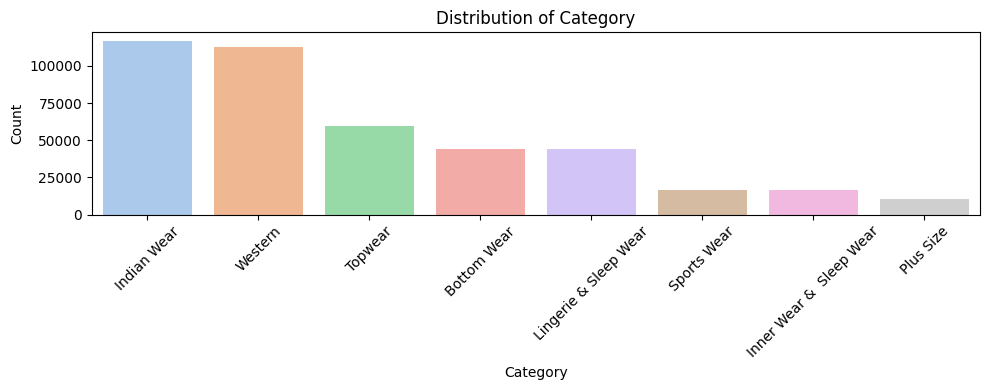

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


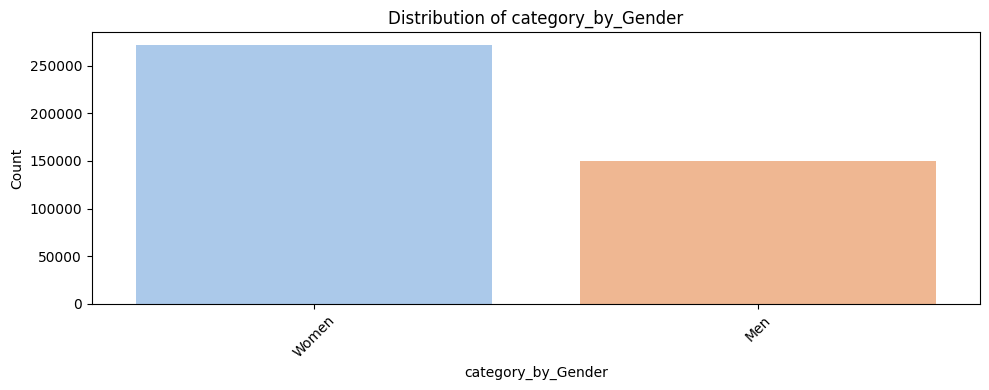

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


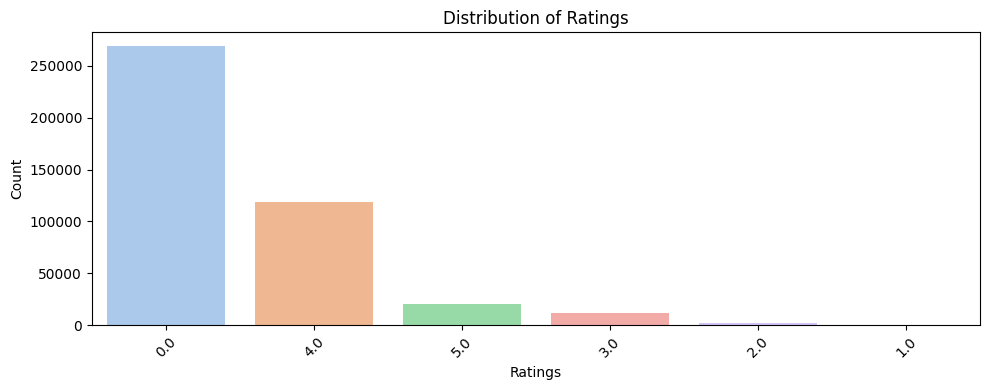

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


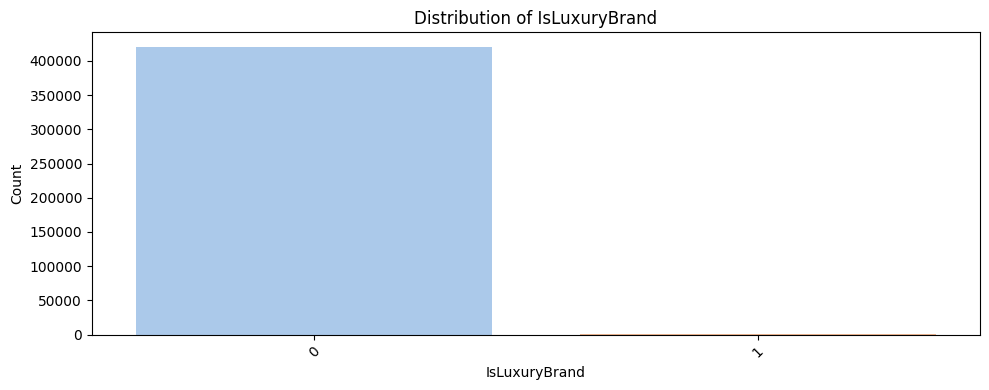

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


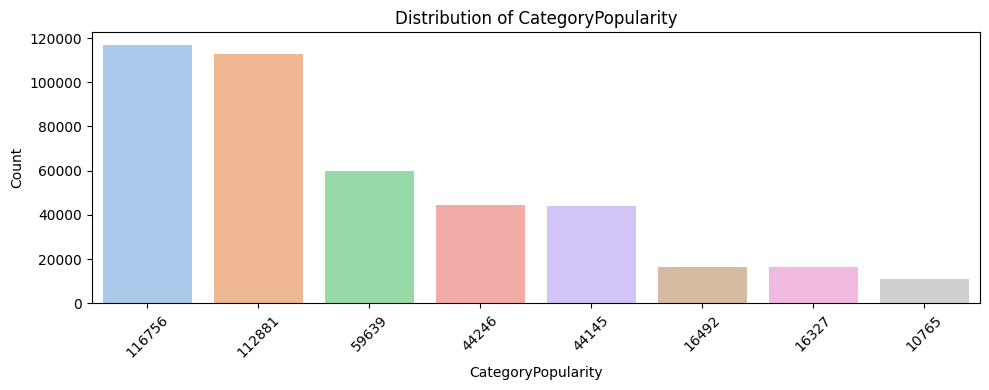

<ipython-input-15-46cb2376f206>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)


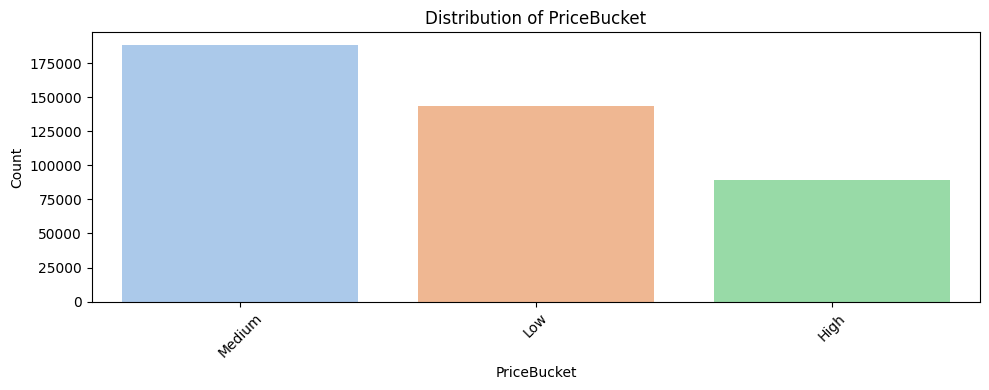

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loop through categorical + numeric columns with <10 unique values
for col in x_train_fe.select_dtypes(include=['object', 'float', 'int']).columns:
    if x_train_fe[col].nunique() < 10:
        plt.figure(figsize=(10, 4))
        sns.countplot(data=x_train_fe, x=col, palette='pastel', order=x_train_fe[col].value_counts().index)
        plt.title(f"Distribution of {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Univariate Analysis Observations:
1. Women purchase more products compared to men.
2. A significant number of products have no ratings.
3. Luxury goods are far fewer in number compared to non-luxury goods.
4. The remaining categorical features follow a relatively normal distribution.

Bivariate Analysis

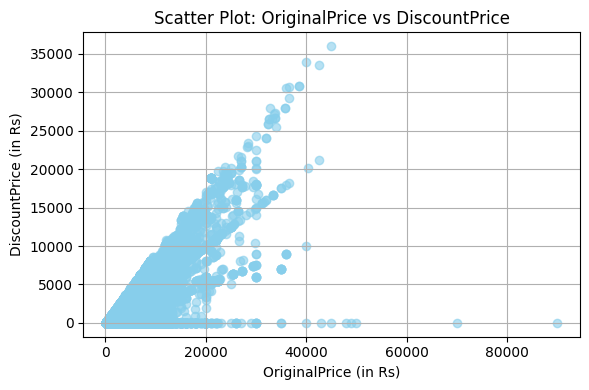

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
plt.scatter(x_train_fe['OriginalPrice (in Rs)'], y_train, alpha=0.6, color='skyblue')
plt.title("Scatter Plot: OriginalPrice vs DiscountPrice")
plt.xlabel("OriginalPrice (in Rs)")
plt.ylabel("DiscountPrice (in Rs)")
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


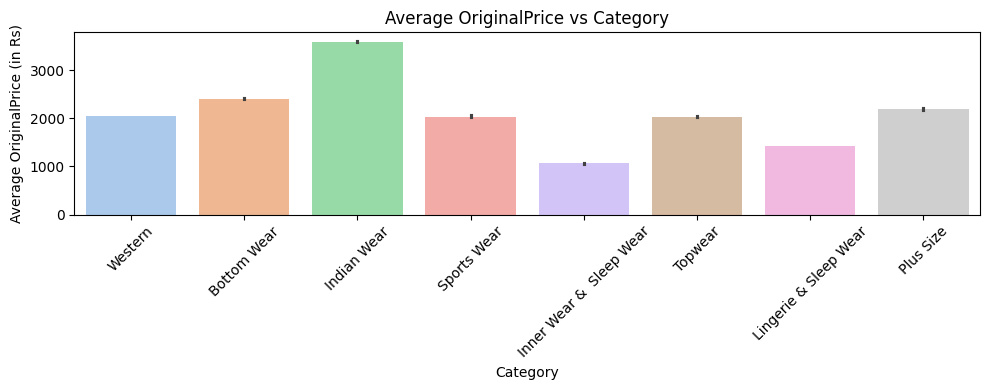

<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


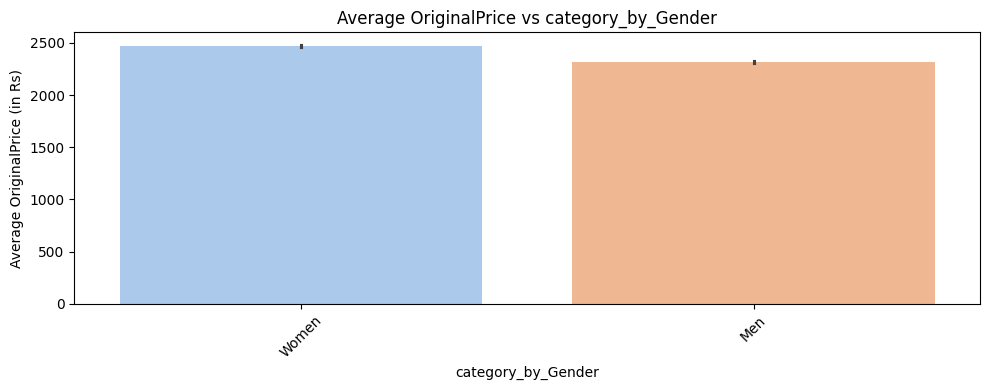

<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


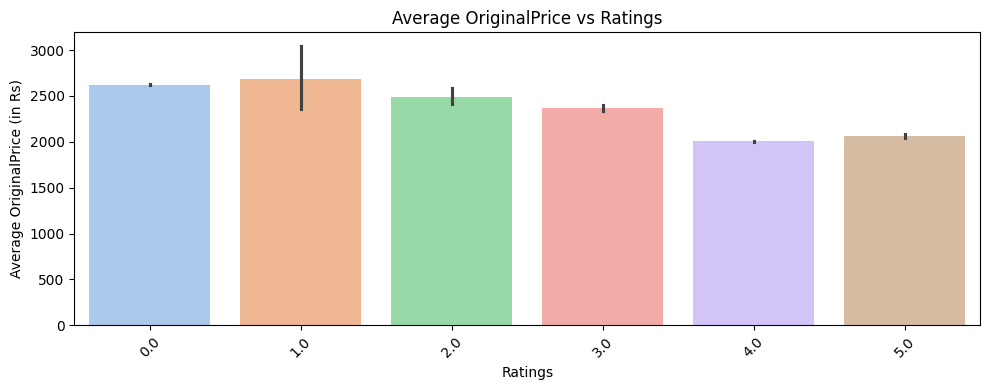

<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


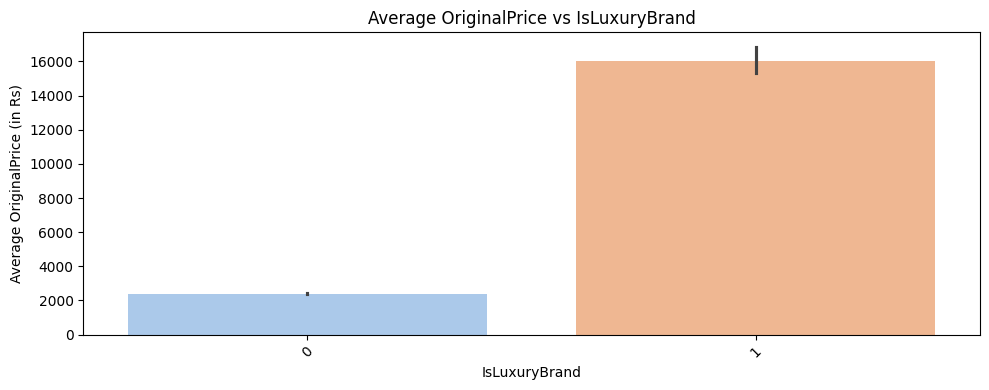

<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


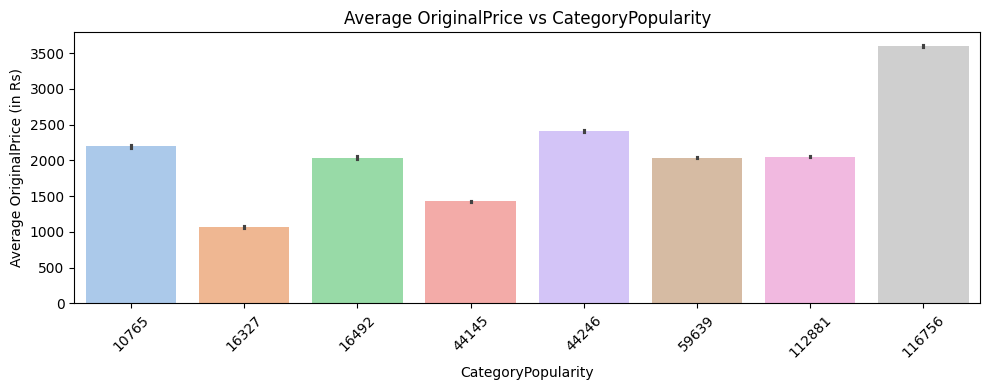

<ipython-input-17-28a4422df8f7>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)


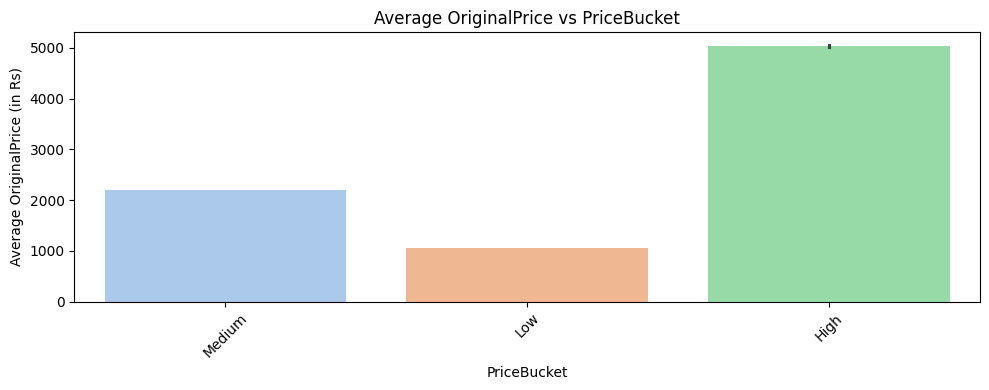

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in x_train_fe.select_dtypes(include=['object', 'float', 'int']).columns:
    if x_train_fe[col].nunique() < 10 and col != 'OriginalPrice (in Rs)':
        plt.figure(figsize=(10, 4))
        sns.barplot(data=x_train_fe, x=col, y='OriginalPrice (in Rs)', palette='pastel', estimator=np.mean)
        plt.title(f"Average OriginalPrice vs {col}")
        plt.xlabel(col)
        plt.ylabel("Average OriginalPrice (in Rs)")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()


Bivariate Analysis Observations:
1. Products priced above ₹40,000 generally receive little to no discount. However, for lower-priced products, there is a trend where higher prices are associated with higher discount amounts.
2. The average original price of products remains fairly consistent across different categories, showing minimal variation.

Multivariate Analysis

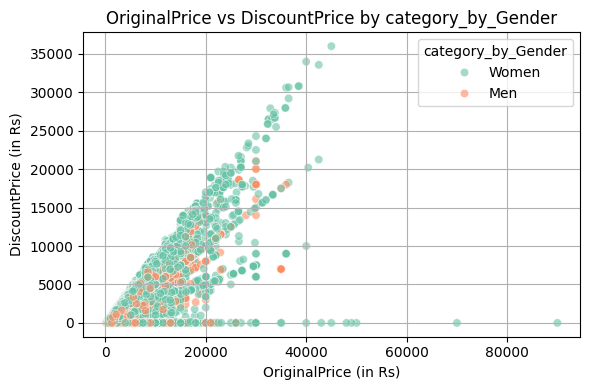

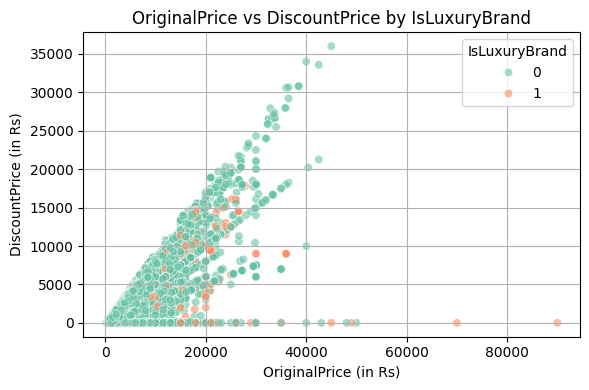

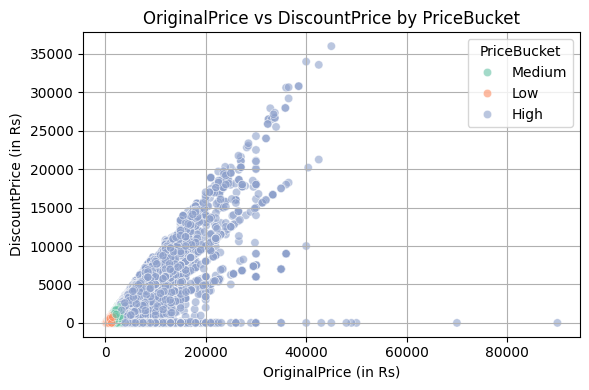

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: color by all categorical or low-cardinality numeric features
for col in x_train_fe.select_dtypes(include=['object', 'float', 'int']).columns:
    if x_train_fe[col].nunique() < 4 and col != 'OriginalPrice (in Rs)':
        plt.figure(figsize=(6, 4))
        sns.scatterplot(
            x=x_train_fe['OriginalPrice (in Rs)'],
            y=y_train,
            hue=x_train_fe[col],
            palette='Set2',
            alpha=0.6
        )
        plt.title(f"OriginalPrice vs DiscountPrice by {col}")
        plt.xlabel("OriginalPrice (in Rs)")
        plt.ylabel("DiscountPrice (in Rs)")
        plt.legend(title=col)
        plt.grid(True)
        plt.tight_layout()
        plt.show()


Multivariate Analysis Observations:
1. Gender and Discounts: Female customers receive significantly higher discounts compared to male customers.
2. Luxury vs Non-Luxury Brands: Non-luxury brands tend to offer higher discounts than luxury brands.

# Feature Encoding

In [19]:
from sklearn.preprocessing import OrdinalEncoder
import numpy as np

# Select categorical columns
cat_cols = x_train_fe.select_dtypes(include='object').columns

# Create the encoder
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

# Fit on training data
x_train_fe[cat_cols] = ordinal_encoder.fit_transform(x_train_fe[cat_cols])

# Transform test data
x_test_fe[cat_cols] = ordinal_encoder.transform(x_test_fe[cat_cols])


In [20]:
x_test_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105313 entries, 306203 to 193093
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   BrandName              105313 non-null  float64
 1   Category               105313 non-null  float64
 2   Individual_category    105313 non-null  float64
 3   category_by_Gender     105313 non-null  float64
 4   OriginalPrice (in Rs)  105313 non-null  float64
 5   Ratings                105313 non-null  float64
 6   IsLuxuryBrand          105313 non-null  int64  
 7   CategoryPopularity     105313 non-null  int64  
 8   PriceBucket            105313 non-null  float64
dtypes: float64(7), int64(2)
memory usage: 8.0 MB


In [21]:
from sklearn.preprocessing import StandardScaler

# 1. Initialize scalers
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# 2. Scale features
x_train_scaled = scaler_X.fit_transform(x_train_fe)
x_test_scaled = scaler_X.transform(x_test_fe)

# 3. Scale target (reshape is important!)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))


print(y_train_scaled)

[[ 0.56294639]
 [-0.89995373]
 [-0.89995373]
 ...
 [ 1.22385302]
 [-0.29061527]
 [-0.00606762]]


Checking which model performs best

In [22]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb

models = {
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "XGBoost": xgb.XGBRegressor(),
    "Linear Regression": LinearRegression()
}

for name, model in models.items():
    model.fit(x_train_scaled, y_train_scaled)
    y_pred = model.predict(x_test_scaled)

    mae = mean_absolute_error(y_test_scaled, y_pred)
    mse = mean_squared_error(y_test_scaled, y_pred)
    # rmse = mean_squared_error(y_test_scaled, y_pred, squared=False)
    r2 = r2_score(y_test_scaled, y_pred)

    print(f"\n🔍 {name}")
    print("MAE:", mae)
    print("MSE:", mse)
    # print("RMSE:", rmse)
    print("R²:", r2)


✅ Random Forest || MAE: 0.12 || MSE: 0.07 || R²: 0.93

🔸 Gradient Boosting || MAE: 0.31 || MSE: 0.25 || R²: 0.75

🔸 XGBoost || MAE: 0.21 || MSE: 0.14 || R²: 0.86

🚫 Linear Regression || MAE: 0.37 || MSE: 0.35 || R²: 0.64

Based on above observation lets do hyperparameter tuning

In [ ]:
# # Get predictions
# y_pred_scaled = model.predict(x_test_scaled)

# # Inverse the scaling to get original values
# y_pred_original = scaler_y.inverse_transform(y_pred_scaled)

# from sklearn.metrics import mean_squared_error
# import numpy as np

# # RMSE evaluation
# rmse = np.sqrt(mean_squared_error(y_test, y_pred_original))
# print(f"RMSE: {rmse}")
